<a href="https://colab.research.google.com/github/GiovaniMicheloni/mlearning-w-python/blob/main/base_credito2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Base de creditos
 Pre processamento de dados (dados inconsistentes(negativos/nulos), escalonamento e padronização de valores...)
 algoritmo para prever se o cliente pagará a divida/emprestimo

In [1]:
!pip -q install plotly
!pip -q install yellowbrick
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
basecredito = pd.read_csv('/content/credit_data.csv')

In [4]:
basecredito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [5]:
basecredito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


# Primeira leitura da nossa tabela:
 2mil registros, colunas - ID, renda anual, idade, divida e o registro se são clientes inadimplentes ou não,  0 = não, 1 = sim
 temos a média, minimo e maximo de todos os valores
 std = desvio padrão,  indica o quanto os valores de um conjunto de dados variam ou se dispersam em relação à média.

In [6]:
basecredito[basecredito['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [7]:
np.unique(basecredito['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

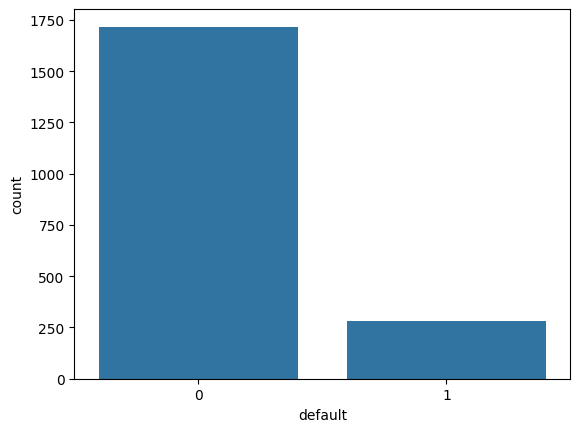

In [8]:
grafdefault =sns.countplot(x = basecredito['default']);


(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

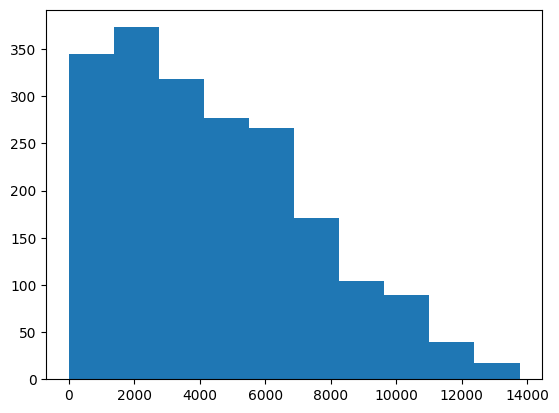

In [9]:
plt.hist(basecredito['loan'])

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

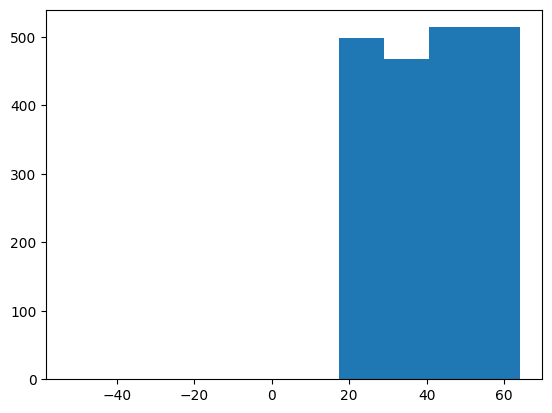

In [10]:
plt.hist(basecredito['age'])

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

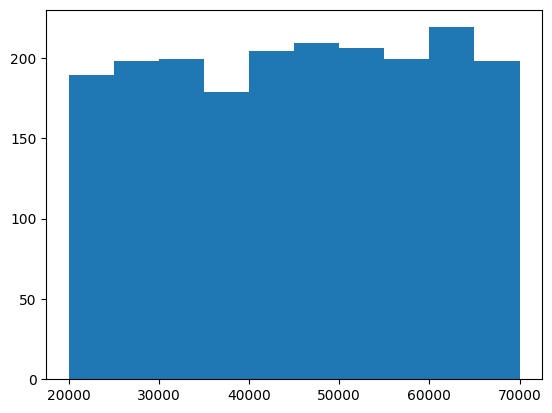

In [11]:
plt.hist(basecredito['income'])

In [12]:
grafico = px.scatter_matrix(basecredito, dimensions=[ 'age','loan', 'income'], color ='default')
grafico.show()

acima no grafico age(x) x loan(y), vemos um padrão nos clientes inadimplentes, grupo se conscentra em dividas acima de 4,5 mil e com idade entre 18 e 34

antes de tratar os valores, poderá ver que existem idades negativas, após tratar esses valores inconsistentes, execute novamente o gráfico

# TRATAMENTO DE VALORES INCONSISTENTES

In [13]:
basecredito[basecredito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [14]:
#media das idades
basecredito['age'][basecredito['age']>0].mean()

40.92770044906149

In [15]:
#preencher as idades negativas com a media das idades
basecredito.loc[basecredito['age']<0, 'age'] = 40.92;

In [16]:
basecredito[basecredito['age']<0]


,clientid,income,age,loan,default


In [17]:
basecredito.loc[basecredito['clientid'].isin([16,22,27])]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


In [18]:
basecredito.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [19]:
basecredito.isnull().sum()
# 3 idades nulas

,0
clientid,0
income,0
age,3
loan,0
default,0


In [20]:
basecredito.loc[pd.isnull(basecredito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [21]:
#preencher as idades nulas com a media das idades
basecredito['age'] = basecredito['age'].fillna(basecredito['age'].mean())

In [22]:
basecredito.loc[basecredito['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [23]:
basecredito.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


divisão entre previsores(x) e classe(y)
previsores- income, age,loan

In [24]:
x_credit = basecredito.iloc[:, 1:4].values
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [25]:
y_credit = basecredito.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
x_credit[:,0].min(), x_credit[:,0].max()



(20014.4894700497, 69995.6855783239)

In [27]:
x_credit[:,1].min(), x_credit[:,1].max()


(18.055188510566897, 63.971795841120205)

In [28]:
x_credit[:,2].min(), x_credit[:,2].max()

(1.37762959325451, 13766.0512393337)

Escalonamento dos valores

In [29]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)
x_credit


array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [30]:
x_credit[:,2].min(), x_credit[:,2].max()

(-1.4592791099462408, 3.0616609141708273)

dividir o banco em treinamento e testes

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xcredito_treino, xcredito_test, ycredito_treino, ycredito_test = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)



In [33]:
ycredito_treino.shape

(1500,)

In [34]:
xcredito_treino.shape

(1500, 3)

In [35]:
xcredito_test.shape, ycredito_test.shape

((500, 3), (500,))

In [36]:
import pickle
file_path = '/content/basecredit.pkl'
with open('basecredit.pkl', 'wb')as f:
  pickle.dump([xcredito_treino, xcredito_test, ycredito_treino, ycredito_test], f)

In [37]:
import pickle
with open('basecredit.pkl', 'rb')as f:
  xcredito_treino, xcredito_test, ycredito_treino, ycredito_test = pickle.load(f)

Treinar com decision tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
arvore_credit.fit(xcredito_treino, ycredito_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
previsoes = arvore_credit.predict(xcredito_test)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
ycredito_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
from sklearn.metrics import accuracy_score, classification_report

In [59]:
accuracy_score(ycredito_test, previsoes)

0.982

0.982

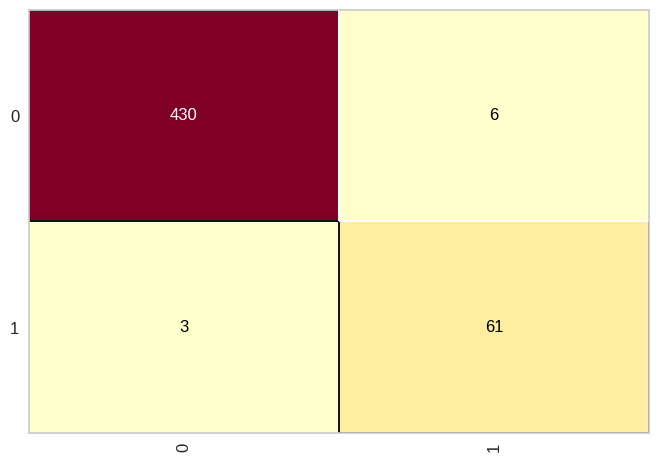

In [60]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(xcredito_treino, ycredito_treino)
cm.score(xcredito_test,ycredito_test)

In [61]:
print(classification_report(ycredito_test,previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



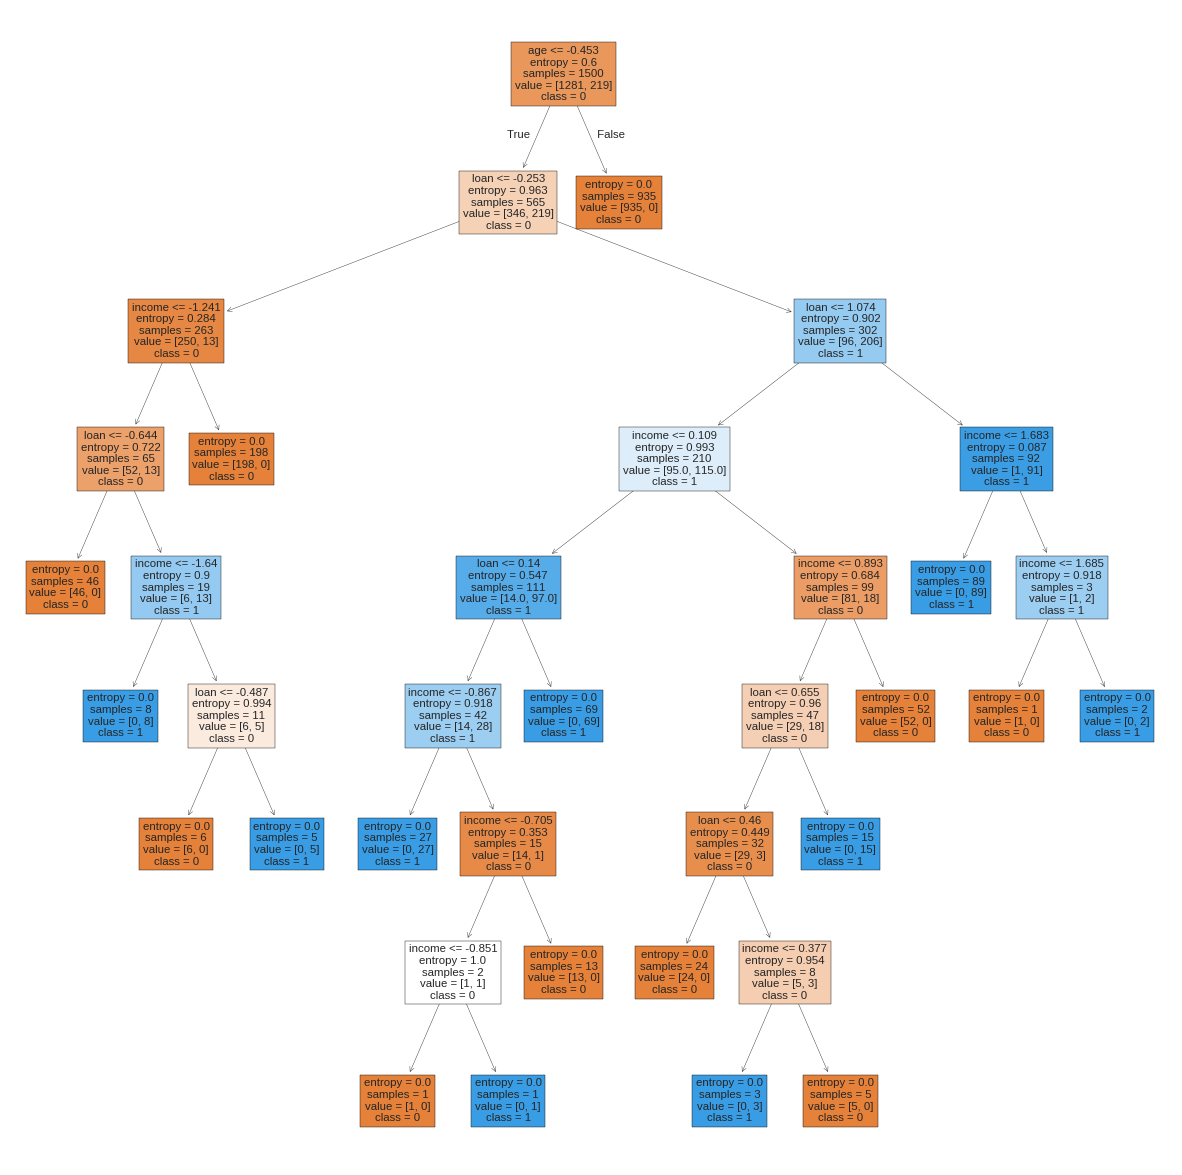

In [69]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['income','age','loan']
fig, axes = plt.subplots(nrows =1, ncols =1, figsize =(15,15))
tree.plot_tree(arvore_credit,feature_names = previsores,class_names=arvore_credit.classes_.astype(str),filled=True)
fig.savefig('arvore_credit.png')